In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly import graph_objects as go
from scipy import stats as st
from matplotlib.dates import DateFormatter
import math as mth

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import  precision_score, recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

**Paso 1. Descargar los datos**

In [46]:
clients= pd.read_csv("C:\\Users\\Stephania\\.vscode\\P13\\gym_churn_us.csv", sep=',' )


**PASO 2: Llevar a cabo el análisis exploratorio de datos (EDA)**

**2.1 Observa el dataset: ¿contiene alguna característica ausente? Estudia los valores promedio y la desviación estándar (utiliza el método describe()).**




In [47]:

print(clients.shape)
display(clients.info())
display(clients.head(10))

(4000, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-n

None

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0
5,1,1,0,0,1,1,1,34,450.743960,1.0,3,2.623477,2.637007,0
6,1,1,1,1,0,6,1,32,94.266389,6.0,2,1.138941,1.277242,0
7,0,1,0,0,1,1,0,30,217.786641,1.0,0,1.213502,1.049387,1
8,1,1,1,1,1,1,1,23,45.409909,1.0,1,1.106239,1.059333,0
9,0,1,0,0,1,1,0,31,65.310836,1.0,11,1.810852,1.951368,0


Se observa que no existen valores ausentes en el dataset y que solo se encuentran valores numéricos.Por otra parte, los nombres de las columnas cuentan con mayúsculas por lo que se transformarán estos para que solo contengan minúsculas y el trabajo con los datos en el futuro sea más fácil.

In [48]:
clients.columns = clients.columns.str.lower()
display(clients.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   near_location                      4000 non-null   int64  
 2   partner                            4000 non-null   int64  
 3   promo_friends                      4000 non-null   int64  
 4   phone                              4000 non-null   int64  
 5   contract_period                    4000 non-null   int64  
 6   group_visits                       4000 non-null   int64  
 7   age                                4000 non-null   int64  
 8   avg_additional_charges_total       4000 non-null   float64
 9   month_to_end_contract              4000 non-null   float64
 10  lifetime                           4000 non-null   int64  
 11  avg_class_frequency_total          4000 non-null   float

None

In [49]:
# estadísticas descriptivas completas
print("Estadísticas descriptivas generales:")
display(clients.describe())




Estadísticas descriptivas generales:


,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


Se observan las sigueinets variables y su comportamiento respecto a su desviación estándar y media:
- avg_class_frequency_current_month: posee una media de 1.77 y desviación estándar de 1.05.Se obtiene una coeficiente de variación de 59%, lo que significa que los datos poseen gran variabilidad, es decir, clientes que frecuentan mayormente las instalaciones y otros que no lo hacen. Además,al observar los valores de los cuartiles, se puede concluir que el 25% de los clientes visitan el gimnasio al menos una vez por semana del mes en curso.

- avg_class_frequency_total: posee una media de 1.87 y una desviación estándar de 0.97, obteniendo un coeficiente de variación del 51%.
- churn: posee una media de 27%, lo que indica un 27% de cancelación mensual, es decir, se pierden al menos 1 por cada 4 clientes cada mes.Posee una desviación estándar de 0.44, obteniendo un coeficiente de variación de 1,62

En general, la frecuencia actual de visita de los clientes es menor que la histórica.Esto se puede relacionar a su vez con la cancelación para el mes estudiado que se ve en alza.Es decir, se puede observar a primera vista que pu8ede existir una crisis de retención que requiere atención inmediata.


**2.2 Observa los valores medios de las características en dos grupos: para las personas que se fueron (cancelación) y para las que se quedaron (utiliza el método groupby()).**

In [50]:
# se agrupa por estado de churn y se obtiene la estadística descriptiva
print("=== COMPARACIÓN POR ESTADO DE CHURN ===")
churn_analysis = clients.groupby('churn').mean()
display(churn_analysis)

=== COMPARACIÓN POR ESTADO DE CHURN ===


,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


**2.3 Traza histogramas de barras y distribuciones de características para aquellas personas que se fueron (cancelación) y para las que se quedaron.**

Generando histogramas para: age, lifetime, avg_class_frequency_total, avg_class_frequency_current_month, avg_additional_charges_total, month_to_end_contract, contract_period


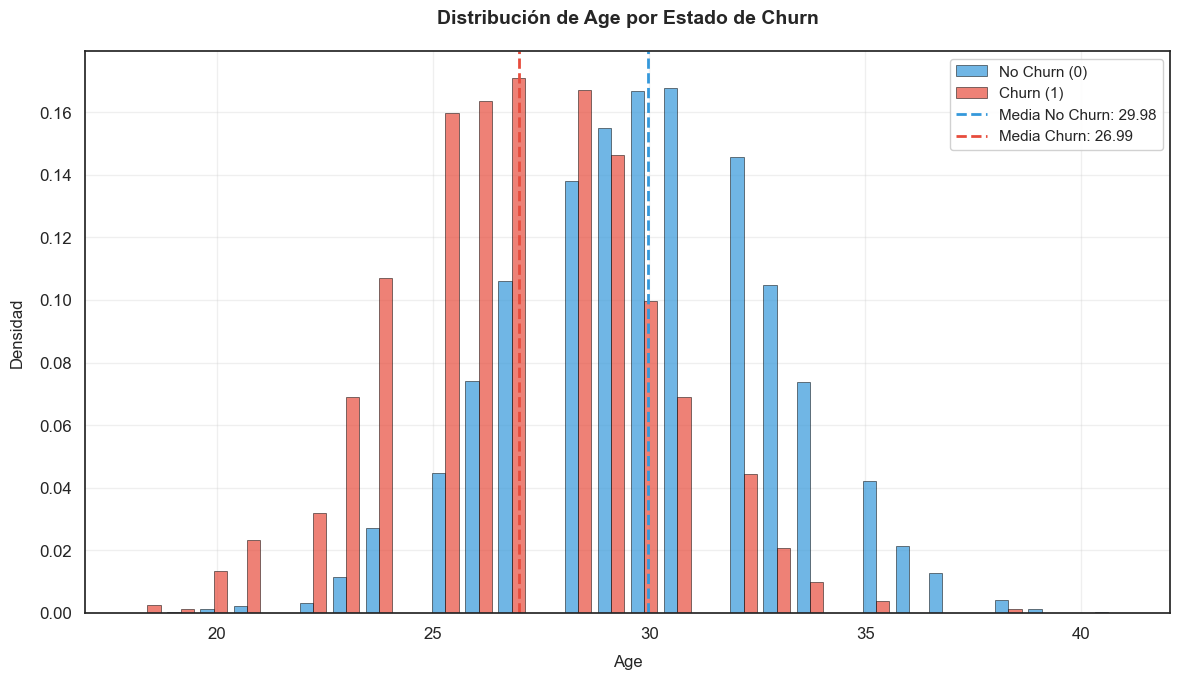

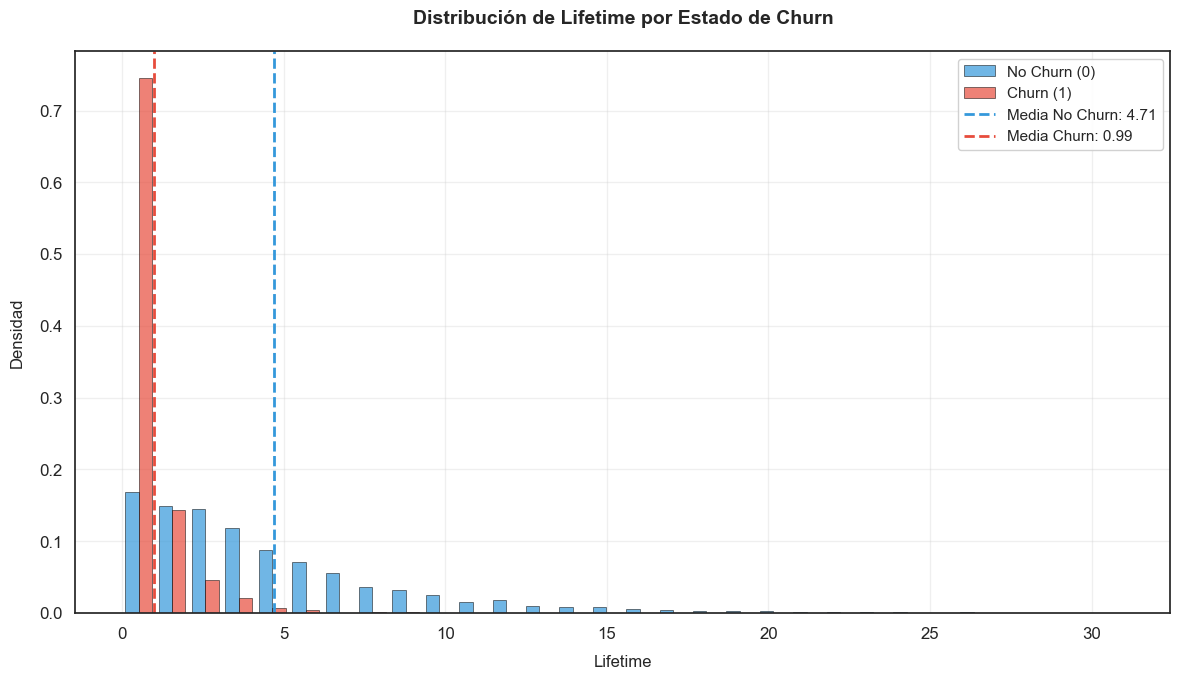

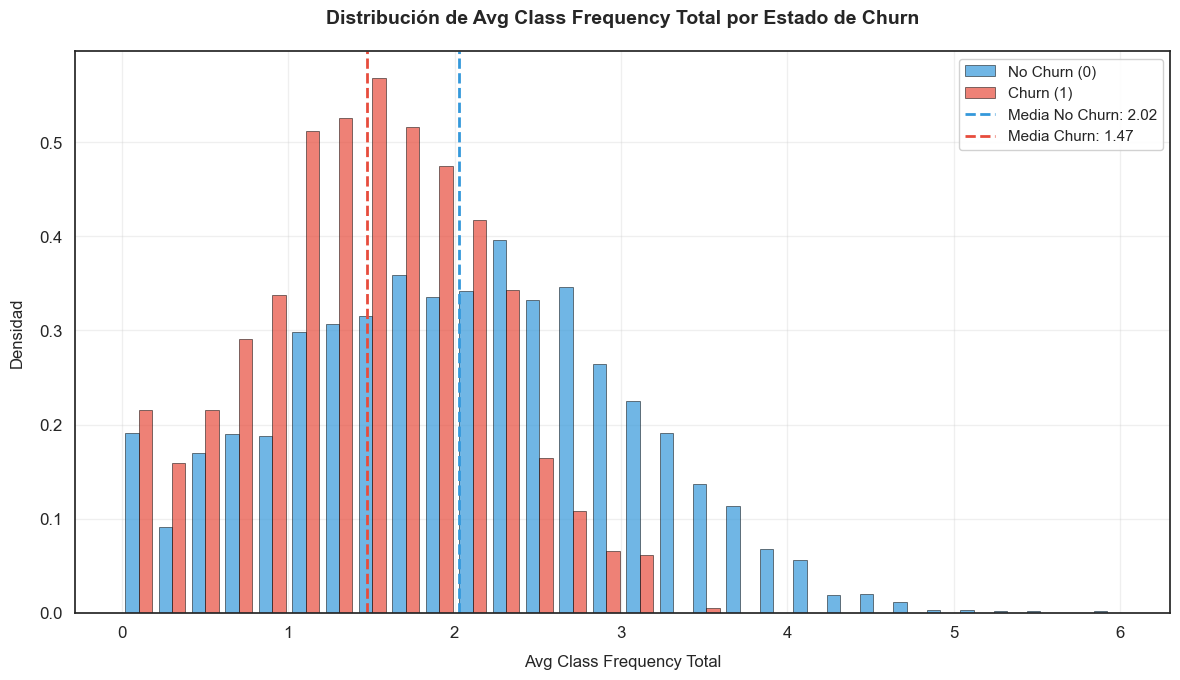

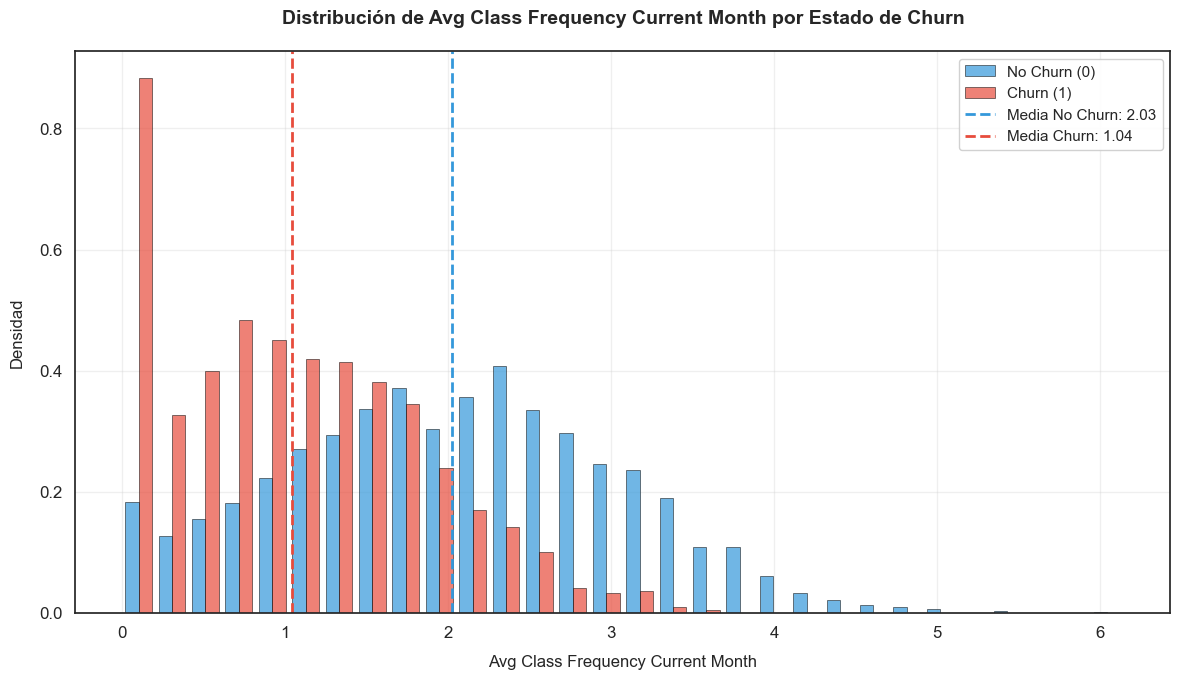

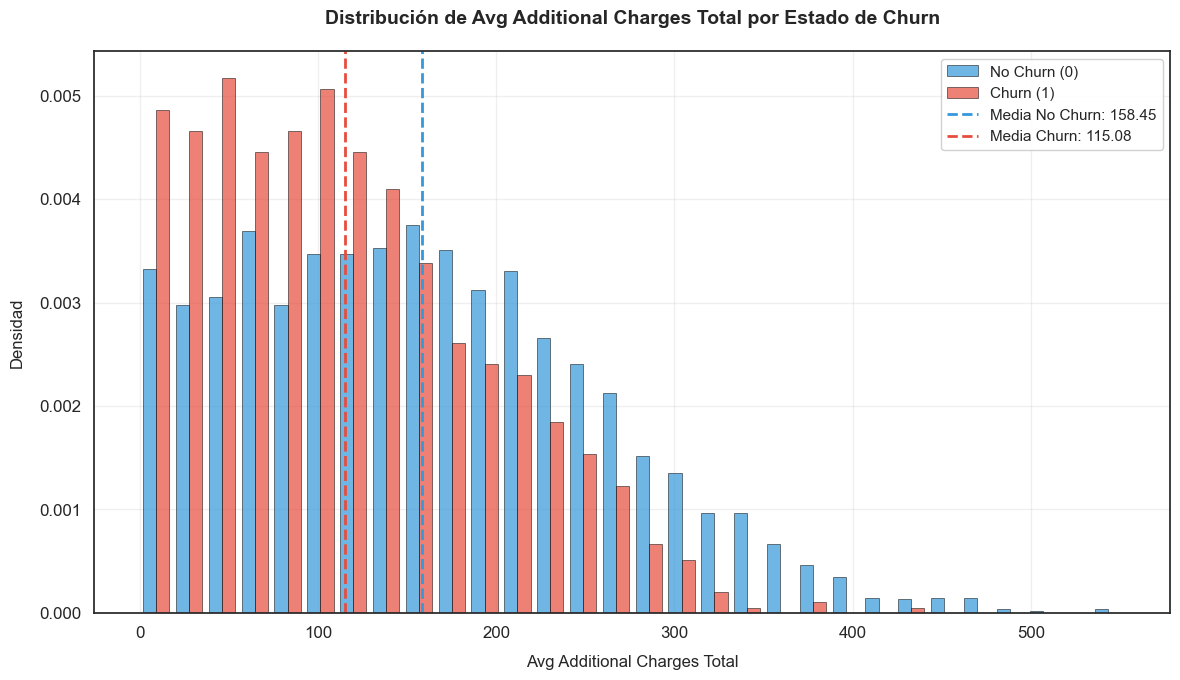

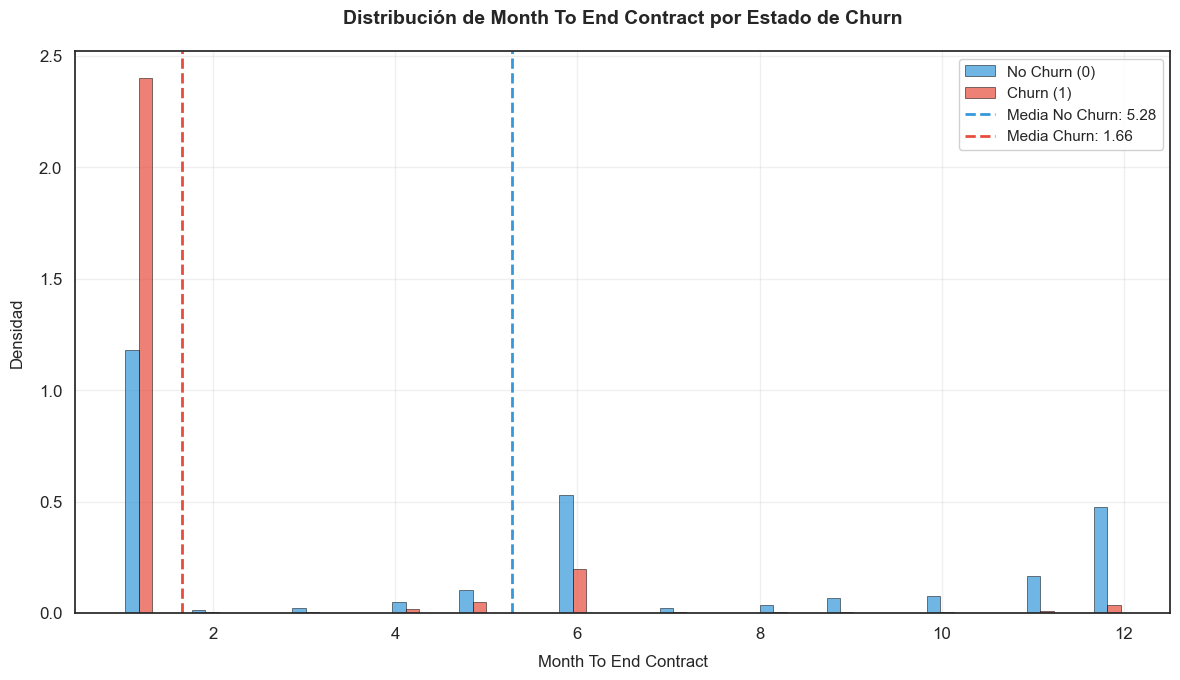

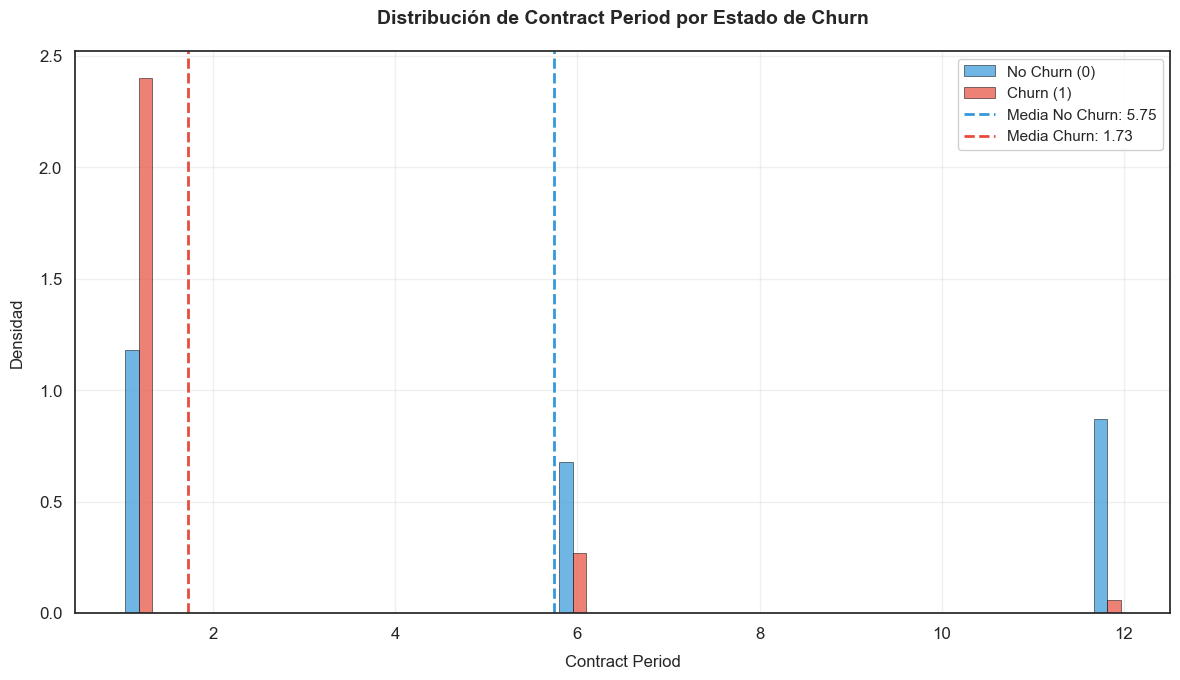

In [51]:
import matplotlib.pyplot as plt

def create_individual_histograms(clients):
    """
    Versión mejorada: crear histogramas individuales más grandes con validaciones
    """
    # Verificar si el DataFrame está vacío
    if clients.empty:
        print("¡El DataFrame está vacío!")
        return
    
    variables = [
        'age', 
        'lifetime', 
        'avg_class_frequency_total',
        'avg_class_frequency_current_month', 
        'avg_additional_charges_total',
        'month_to_end_contract', 
        'contract_period'
    ]
    
    colors = ['#3498db', '#e74c3c']
    labels = ['No Churn (0)', 'Churn (1)']
    
    # Verificar qué variables existen en el DataFrame
    available_vars = [var for var in variables if var in clients.columns]
    if not available_vars:
        print("Ninguna de las variables solicitadas existe en el DataFrame")
        return
    
    print(f"Generando histogramas para: {', '.join(available_vars)}")
    
    # Crear un gráfico individual para cada variable
    for var in available_vars:
        plt.figure(figsize=(12, 7))  # Tamaño un poco más grande
        
        # Separar datos con validación
        no_churn_data = clients[clients['churn'] == 0][var].dropna()
        churn_data = clients[clients['churn'] == 1][var].dropna()
        
        if no_churn_data.empty or churn_data.empty:
            print(f"Advertencia: No hay datos suficientes para {var}")
            continue
            
        # Crear histograma
        plt.hist([no_churn_data, churn_data], 
                bins=30, 
                alpha=0.7, 
                color=colors, 
                label=labels,
                density=True,
                edgecolor='black',
                linewidth=0.5)
        
        # Configuración del gráfico
        title = f'Distribución de {var.replace("_", " ").title()} por Estado de Churn'
        plt.title(title, fontsize=14, fontweight='bold', pad=20)
        plt.xlabel(var.replace("_", " ").title(), fontsize=12, labelpad=10)
        plt.ylabel('Densidad', fontsize=12, labelpad=10)
        
        # Añadir líneas verticales para las medias
        no_churn_mean = no_churn_data.mean()
        churn_mean = churn_data.mean()
        
        plt.axvline(no_churn_mean, color=colors[0], linestyle='--', linewidth=2,
                   label=f'Media No Churn: {no_churn_mean:.2f}')
        plt.axvline(churn_mean, color=colors[1], linestyle='--', linewidth=2,
                   label=f'Media Churn: {churn_mean:.2f}')
        
        plt.legend(fontsize=11, framealpha=0.9)
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        
        # Mostrar el gráfico
        plt.show()

# Ejemplo de uso:
create_individual_histograms(clients)

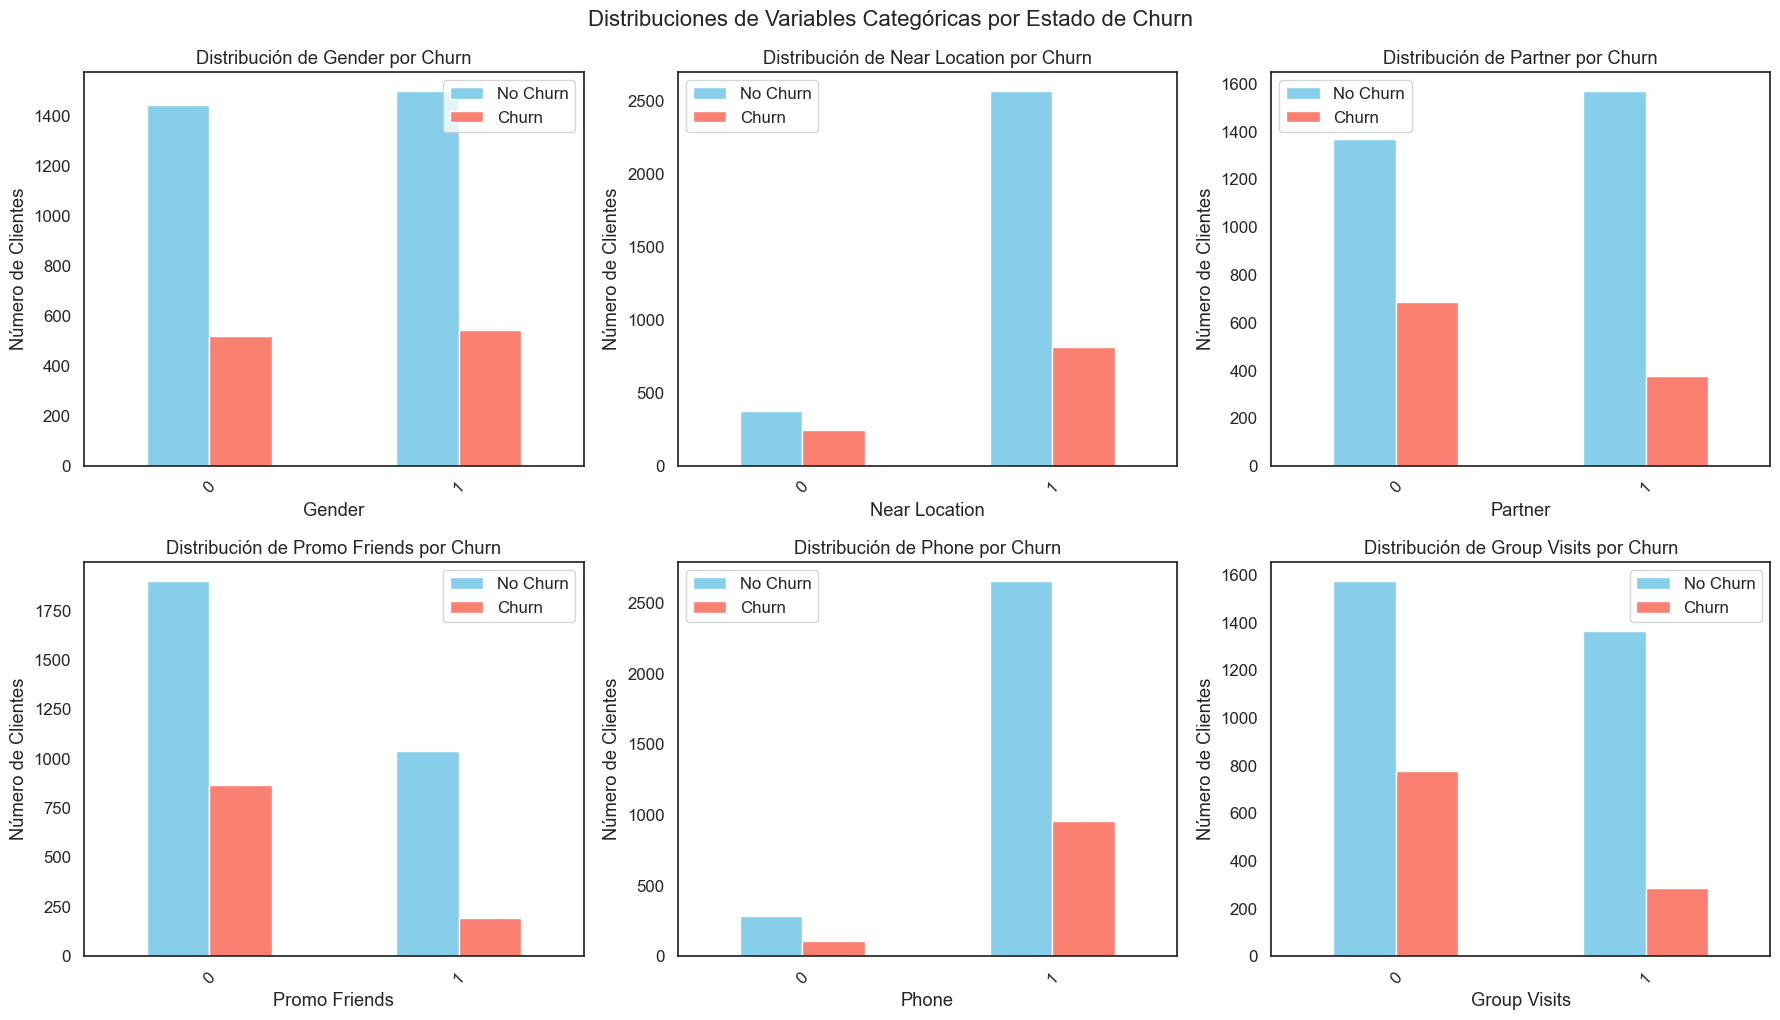

In [52]:
# 3. GRÁFICOS DE BARRAS PARA VARIABLES CATEGÓRICAS
def plot_categorical_distributions(clients):
    """Crear gráficos de barras para variables categóricas"""
    
    categorical_vars = ['gender', 'near_location', 'partner', 
                       'promo_friends', 'phone', 'group_visits']
    
    fig, axes = plt.subplots(2, 3, figsize=(18, 10))
    axes = axes.ravel()
    
    for i, var in enumerate(categorical_vars):
        if var in clients.columns:
            # Crear tabla cruzada
            crosstab = pd.crosstab(clients[var], clients['churn'])
            
            # Gráfico de barras agrupadas
            crosstab.plot(kind='bar', ax=axes[i], color=['skyblue', 'salmon'])
            axes[i].set_title(f'Distribución de {var.replace("_", " ").title()} por Churn')
            axes[i].set_xlabel(var.replace("_", " ").title())
            axes[i].set_ylabel('Número de Clientes')
            axes[i].legend(['No Churn', 'Churn'])
            axes[i].tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.suptitle('Distribuciones de Variables Categóricas por Estado de Churn', 
                 fontsize=16, y=1.02)
    plt.show()

plot_categorical_distributions(clients)

**2.4 Crea una matriz de correlación y muéstrala.**

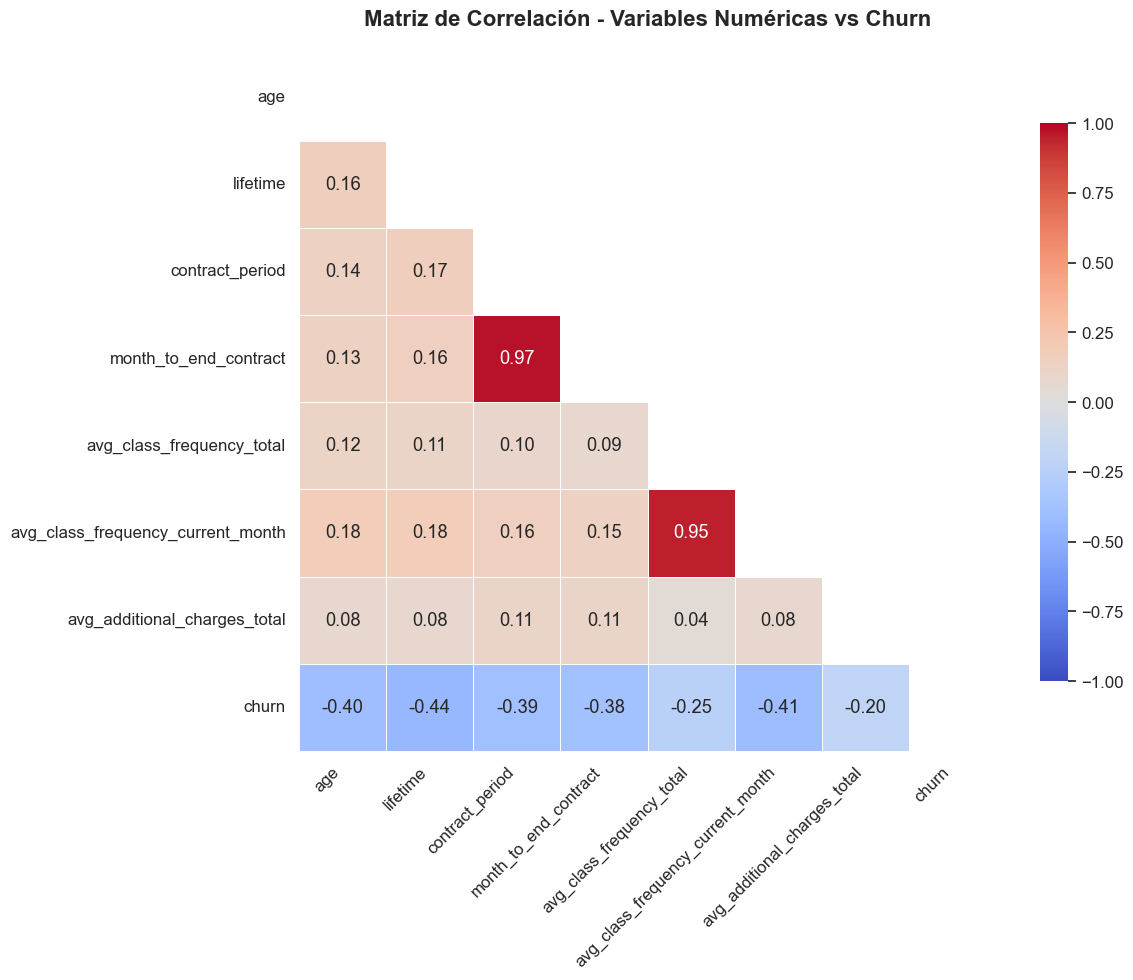

In [53]:
def plot_correlation_matrix(clients):

    # Seleccionar variables numéricas relevantes
    numeric_vars = [
        'age',
        'lifetime',
        'contract_period',
        'month_to_end_contract',
        'avg_class_frequency_total',
        'avg_class_frequency_current_month',
        'avg_additional_charges_total',
        'churn'  # Esta es nuestra variable objetivo
    ]
    
    # Filtrar solo las variables que existen en el DataFrame
    available_vars = [var for var in numeric_vars if var in clients.columns]
    
    # Verificar si tenemos variables para analizar
    if len(available_vars) < 2:
        print("No hay suficientes variables numéricas para analizar")
        return
    
    # Crear subconjunto de datos
    data = clients[available_vars]
    
    # Calcular matriz de correlación
    corr_matrix = data.corr()
    
    # Configurar el estilo visual
    plt.figure(figsize=(12, 10))
    sns.set(font_scale=1.1)
    sns.set_style("white")
    
    # Crear mapa de calor de la matriz de correlación
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))  # Enmascarar la mitad superior
    heatmap = sns.heatmap(
        corr_matrix,
        mask=mask,
        annot=True,
        fmt=".2f",
        cmap="coolwarm",
        center=0,
        vmin=-1,
        vmax=1,
        linewidths=0.5,
        cbar_kws={"shrink": 0.8}
    )
    
    # Añadir título
    plt.title("Matriz de Correlación - Variables Numéricas vs Churn", 
              pad=20, fontsize=16, fontweight='bold')
    
    # Rotar las etiquetas del eje x para mejor legibilidad
    heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45, horizontalalignment='right')
    
    # Ajustar layout y mostrar
    plt.tight_layout()
    plt.show()


plot_correlation_matrix(clients)

Se observa una correlación entre las variables avg_class_frecuency_currenth_month y avg_class_frecuency total y entre las variables month_to_end_contrac y contract period.Por lo que, si se quisiera utilizar un modelo de regresión linear, este sería mas propenso al sobreajuste y presentar inestabilidad en los resultados.

**Paso 3. Construir un modelo para predecir la cancelación de usuarios**


Crea un modelo de clasificación binaria para clientes donde la característica objetivo es la marcha del usuario o la usuaria el mes siguiente.





**3.1 Divide los datos en conjuntos de entrenamiento y validación utilizando la función train_test_split().**

In [ ]:
# primero se lleva a cabo el preprocesamiento de los datos que consiste en la división 
# de los datos entre conjuntos de entrenamiento y validación


# primero se divide en características (X) y variable objetivo (y)
X = clients.drop('churn', axis=1)
y = clients['churn']

# luego, se divide entre conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)





**3.2 Entrena el modelo en el set de entrenamiento con dos métodos: regresión logística;
bosque aleatorio.**

Se prueban  modelos de clasificación binaria (explicar qué variables debo considerar y cómo se relacionan con las predicciones del futuro respecto a si un cliente o no dejará el gimnasio en el mes siguiente al que tengo los datos-prediccion-)):

- Regresión logistica: estima la probabilidad de que el usuario/a se marche el mes siguiente(probabilidad de que una instancia pertenezca a una clase)

- Bosque aleatorio: se ensamblan dsitintos árboles de decisión(si el usuario se marcha o no) que luego promedian para una decisión final


Evaluando modelo: Logistic Regression
Accuracy: 0.9242
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       882
           1       0.89      0.82      0.85       318

    accuracy                           0.92      1200
   macro avg       0.91      0.89      0.90      1200
weighted avg       0.92      0.92      0.92      1200



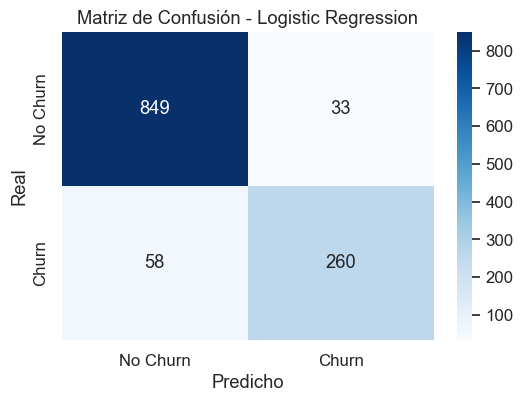


Evaluando modelo: Random Forest
Accuracy: 0.9142
              precision    recall  f1-score   support

           0       0.93      0.96      0.94       882
           1       0.87      0.79      0.83       318

    accuracy                           0.91      1200
   macro avg       0.90      0.88      0.89      1200
weighted avg       0.91      0.91      0.91      1200



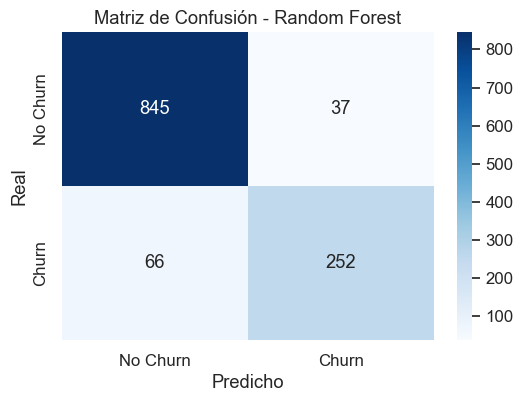


Comparación Final de Modelos:
Modelo               Accuracy   Precision  Recall    
--------------------------------------------------
Logistic Regression  0.9242    0.9500     882.0000
Random Forest        0.9142    0.9400     882.0000


In [63]:
#estandarización para regresión logística 
sacaler= StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# modelos a probar
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(random_state=42),
}

results = {}

for name, model in models.items():
    print(f"\n{'='*50}\nEvaluando modelo: {name}\n{'='*50}")
    
    # Seleccionar datos según el modelo
    if name == 'Logistic Regression':
        train_X = X_train_scaled
        test_X = X_test_scaled
    else:
        train_X = X_train  # Random Forest no necesita escalado
        test_X = X_test
    
    # Entrenamiento
    model.fit(train_X, y_train)
    
    # Predicción
    y_pred = model.predict(test_X)
    
    # Evaluación
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    
    results[name] = {
        'model': model,
        'accuracy': accuracy,
        'report': report,
        'confusion_matrix': cm,
        'scaler': scaler if name == 'Logistic Regression' else None
    }
    
    print(f"Accuracy: {accuracy:.4f}")
    print(report)
    
    # Visualización
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['No Churn', 'Churn'],
                yticklabels=['No Churn', 'Churn'])
    plt.title(f'Matriz de Confusión - {name}')
    plt.xlabel('Predicho')
    plt.ylabel('Real')
    plt.show()

# 4. Resultados comparativos
print("\nComparación Final de Modelos:")
print(f"{'Modelo':<20} {'Accuracy':<10} {'Precision':<10} {'Recall':<10}")
print("-"*50)
for name, result in results.items():
    report_lines = result['report'].split('\n')
    precision = float(report_lines[2].split()[3])
    recall = float(report_lines[2].split()[4])
    print(f"{name:<20} {result['accuracy']:.4f}    {precision:.4f}     {recall:.4f}")

**3.3 Evalúa la exactitud, precisión y recall para ambos modelos utilizando los datos de validación. Utilízalos para comparar los modelos. ¿Qué modelo dio mejores resultados?
Recuerda indicar el parámetro random_state cuando dividas los datos y definas el algoritmo.**

se observa que el modelo de regresión logística tiene una precisión ligeramente superior a la del bosque aleatorio: 92% sobre 91%.
Observando ahora la precisióm, también se encuentra un valor levemente superior en el caso de la Regresión logística (95% sobre 94%)

**Paso 4. Crear clústeres de usuarios/as
Deja de lado la columna con datos sobre la cancelación e identifica los clústeres de objetos (usuarios/as):**





**4.1 Estandariza los datos.
Utiliza la función linkage() para crear una matriz de distancias basada en la matriz de características estandarizada y trazar un dendrograma. Nota: ¡renderizar el dendrograma puede llevar tiempo! Utiliza el gráfico resultante para estimar el número de clústeres que puedes destacar.**

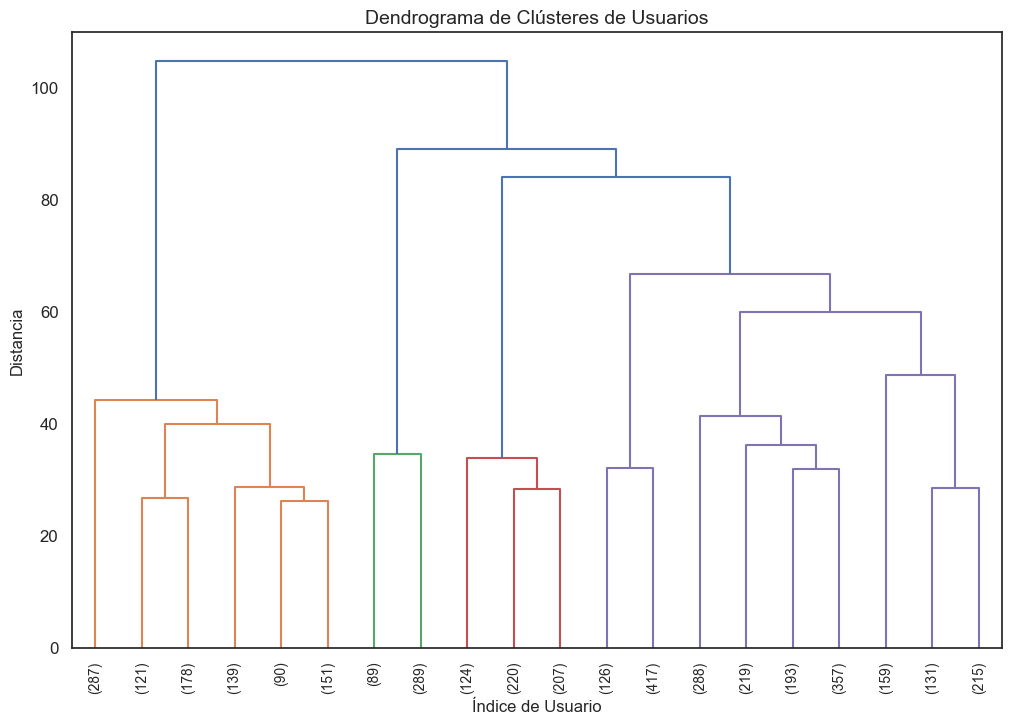


Análisis del dendrograma:
- Las líneas verticales representan usuarios o clústeres
- Las líneas horizontales representan las distancias de fusión
- Cuanto más larga la línea horizontal, mayor diferencia entre clústeres
- Un buen número de clústeres suele estar donde hay grandes saltos en distancia


In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram

# primero se elimina la columna 'churn' ya que se indica no usarla para el clustering
X = clients.drop('churn', axis=1)

#se estandarizan los datos porque hay variables en diferentes escalas, poor lo tanto,
#se busca que todas las variables tengan media 0 y desviacion estandar 1
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# se calcula las distancias entre todos los pares de puntos y,para esto se usa el método 
# de Ward que minimiza la varianza dentro de los clústeres
Z = linkage(X_scaled, method='ward', metric='euclidean')

# dendograna
plt.figure(figsize=(12, 8))
plt.title('Dendrograma de Clústeres de Usuarios', fontsize=14)
plt.xlabel('Índice de Usuario', fontsize=12)
plt.ylabel('Distancia', fontsize=12)
dendrogram(Z, 
           truncate_mode='lastp',  
           p=20,                 
           show_leaf_counts=True,  
           leaf_rotation=90,       
           leaf_font_size=10)
plt.show()

# 5. Análisis del dendrograma (interpretación)
print("\nAnálisis del dendrograma:")
print("- Las líneas verticales representan usuarios o clústeres")
print("- Las líneas horizontales representan las distancias de fusión")
print("- Cuanto más larga la línea horizontal, mayor diferencia entre clústeres")
print("- Un buen número de clústeres suele estar donde hay grandes saltos en distancia")

Se observa quen el número optimo de clústeres sería n = 7, que es justo antes de dividir en los distintos clústeres

**4.2 Entrena el modelo de clustering con el algortimo K-means y predice los clústeres de clientes. (Deja que el número de clústeres sea n=5 para que sea más sencillo comparar los resultados con los del resto del estudiantado.)**




Distribución de clientes por cluster:
cluster
0    1283
1     633
2     646
3     544
4     894
Name: count, dtype: int64


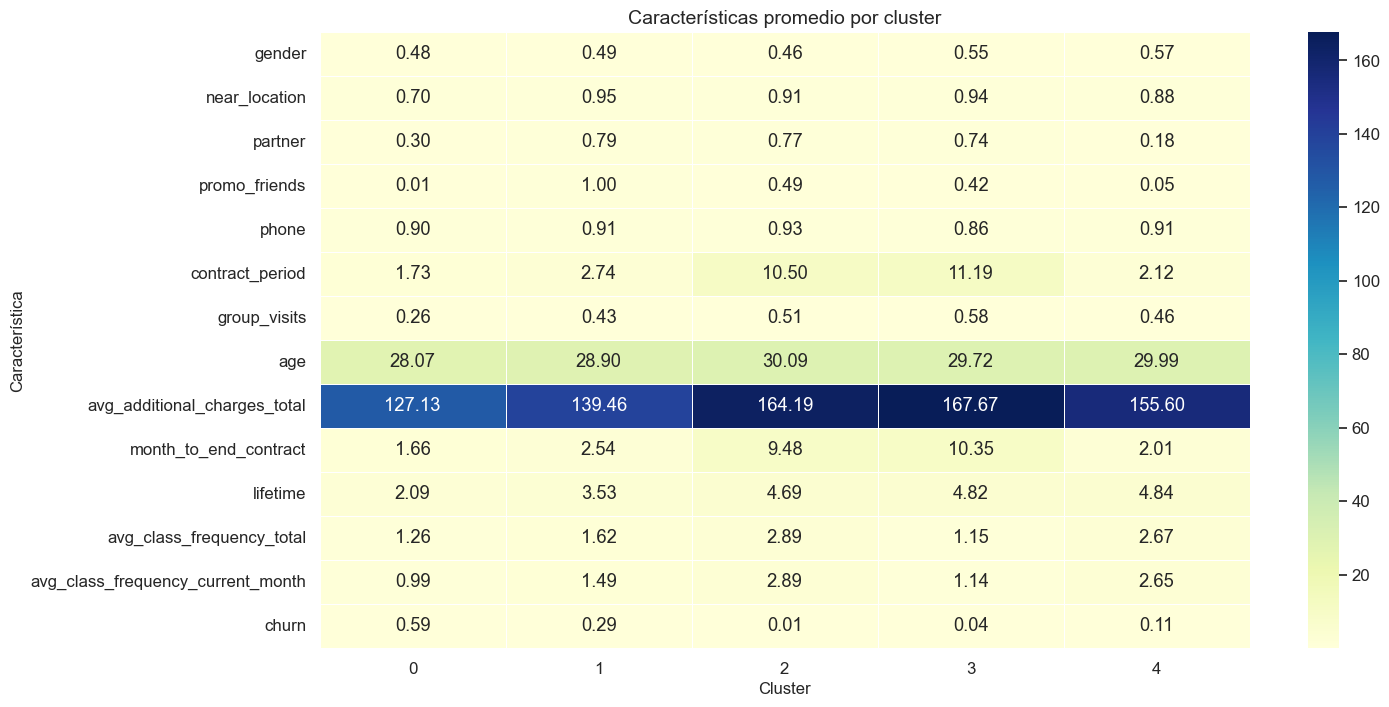

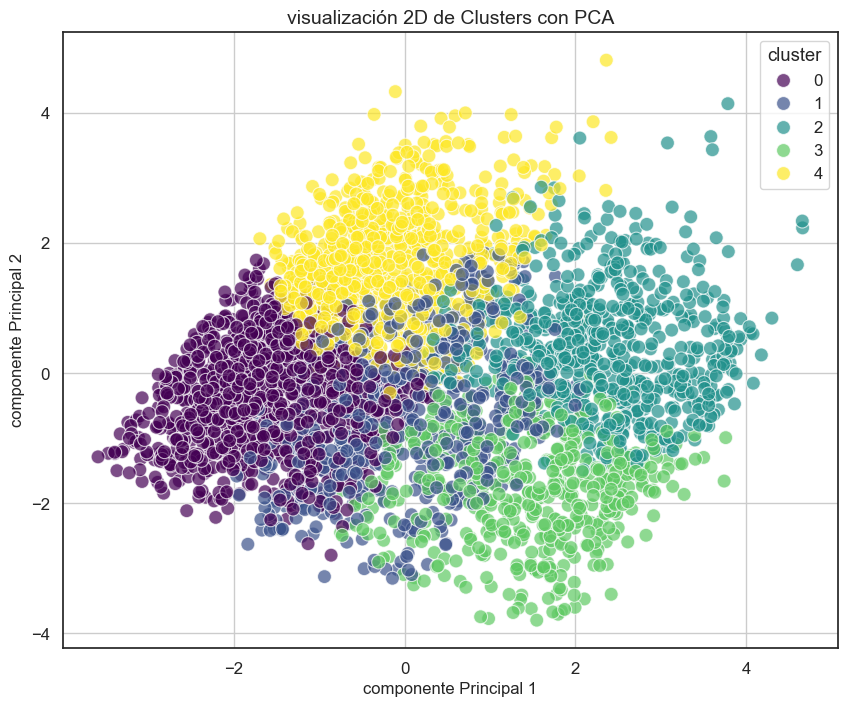


Tasa de churn por cluster:
cluster
0    0.587685
1    0.285940
4    0.105145
3    0.042279
2    0.013932
Name: churn, dtype: float64


In [70]:
#se usan ya los datos estandarizados del paso amnterior para aplicar el algoritmo K-Means
from sklearn.cluster import KMeans

# se lleva a cabo el entrenamiento del modelo K-Means con 5 clusters
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X_scaled)

# se asignan los clusters a cada usuario
clients_clustered = clients.copy()
clients_clustered['cluster'] = kmeans.labels_

# análisis descriptivo de los clusters: tamaño de cada cluster
cluster_sizes = clients_clustered['cluster'].value_counts().sort_index()
print("\nDistribución de clientes por cluster:")
print(cluster_sizes)

# visualización de características por cluster (promedio por cluster)
cluster_means = clients_clustered.groupby('cluster').mean()

# visualización
plt.figure(figsize=(15, 8))
sns.heatmap(cluster_means.T, 
            annot=True, 
            fmt=".2f", 
            cmap="YlGnBu",
            linewidths=.5)
plt.title('Características promedio por cluster', fontsize=14)
plt.xlabel('Cluster', fontsize=12)
plt.ylabel('Característica', fontsize=12)
plt.xticks(rotation=0)
plt.show()

# visualización 2D con PCA para entender mejor la distribución de los clusters
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], 
                hue=kmeans.labels_, 
                palette="viridis",
                alpha=0.7,
                s=100)
plt.title('visualización 2D de Clusters con PCA', fontsize=14)
plt.xlabel('componente Principal 1', fontsize=12)
plt.ylabel('componente Principal 2', fontsize=12)
plt.legend(title='cluster')
plt.grid(True)
plt.show()

# análisis de relación entre clusters y churn 
if 'churn' in clients.columns:
    churn_by_cluster = clients_clustered.groupby('cluster')['churn'].mean()
    print("\nTasa de churn por cluster:")
    print(churn_by_cluster.sort_values(ascending=False))

**4.3 Mira los valores medios de característica para los clústeres.¿Hay algo que te llame la atención?**

Se observa que en el cluster 0 están los usuarios con el menor período de permanencia en el gimnasio y menor tasa de participación en las clases grupales.Son aquellos además con menos % de miembros que pertenecen a empresas asociadas al gimnasio.
En el cluster 1 se observan la más alta tasa de promo_friends, es decir, todos quienes llegaron a ser miembros fue por la promoción de "trae un amigo" pero, se observa al mismo tiempo, que la tasa de permanencia en el gimnasio es la tercera más baja.Se debería estudiar qué está pasando y porqué esa tasa es más alta para este tipo de usuarios.
En los cluster 2 y 3 se observan las tasas de duración de contratos más altos y son los clientrs que hacen más gastos adicionales dentro del gimasio.Se observan leves diferencias entre la asistencia a clases, donde aquellos del cluster 2 participan más de estas y la cercanía al gimnasio, donde los del cluster 3 presentan en general,  más cercanái de sus viviendas a las instalaciones.
En el cluster 4 se observa una alta tasa de asistencia a clases y pocos clientes de este cvluster llegaron por la promoción "trae a un amigo"

**4.4 Traza distribuciones de características para los clústeres. ¿Notas algo?**

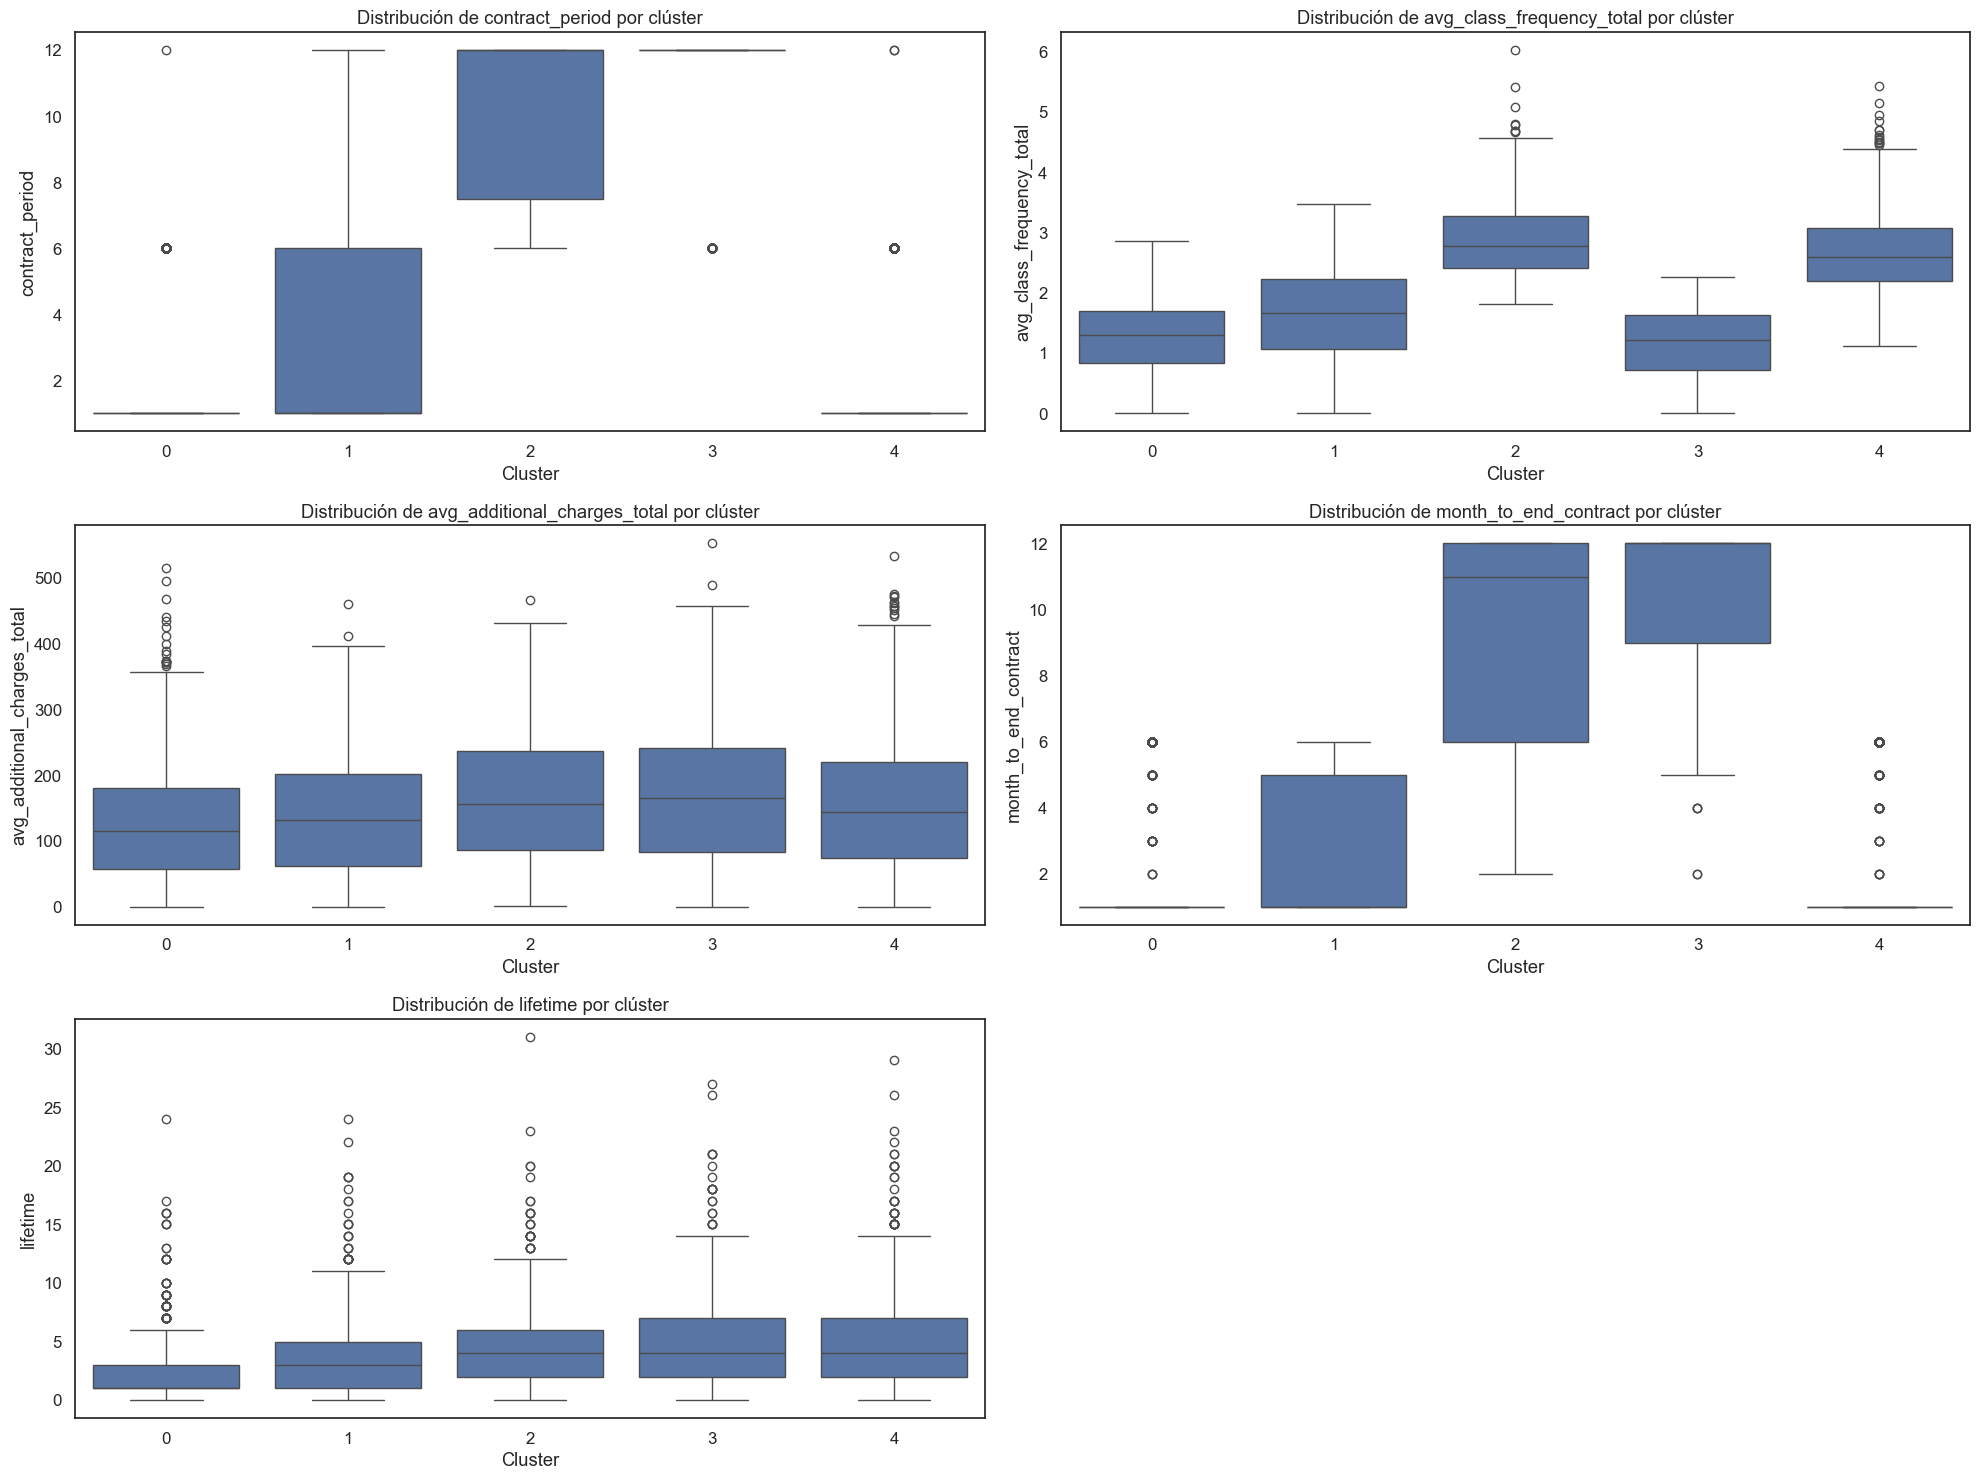

In [ ]:
# se seleccionan las características clave para visualizar
features_to_plot = [
    'contract_period', 
    'avg_class_frequency_total',
    'avg_additional_charges_total',
    'month_to_end_contract',
    'lifetime'
]


plt.figure(figsize=(20, 15))
for i, feature in enumerate(features_to_plot, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(x='cluster', y=feature, data=clients_clustered)
    plt.title(f'Distribución de {feature} por clúster')
    plt.xlabel('Cluster')
    plt.ylabel(feature)
    
plt.tight_layout()
plt.show()

Respecto a la duración del contrato ('contract_period') muestran una distribución concentrada alrededor de 10-12 meses, es decir, se observan los contratos más largosd.A diferencia de los clústeres 0,1 y 3 que presentan los contratos más cortos.
Se observan las más altas frecuencias de asistencia a clases ('avg_clas_frecuency')en el cluster 2.La mayor variabilidad se observa en el cluster 3.Respecto a los valores más bajos, estos pertenecen al cluster 3.
Los clusteres 2 y 3 presentan una distribución asimétrica hacia valores altos de gastos adicionales ('additional_charges'). 
Observando el mes de fin de contrato ('mont_to_end_contract') se observa que muchos de los clientes,sino su mayoría, presenta contratos a punto de vencer, mientras qye en los clústeres 2 y 3 se ven que quedan más de 6 meses para ello.


**4.5 Calcula la tasa de cancelación para cada clúster (utiliza el método groupby()). ¿Difieren en términos de tasa de cancelación? ¿Qué grupos son propensos a irse y cuáles son leales?**

Tasa de cancelación por clúster (%):
cluster
0    58.77
1    28.59
4    10.51
3     4.23
2     1.39
Name: churn, dtype: float64


C:\Users\Stephania\AppData\Local\Temp\ipykernel_29276\2411960048.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_rates.index, y=churn_rates.values, palette="RdYlGn_r")


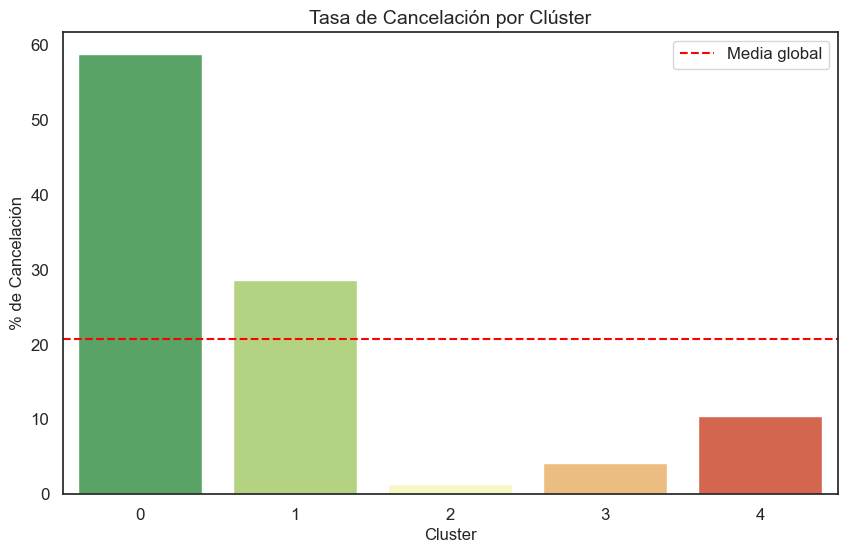

In [73]:
# se calcula la tasa de churn por clúster
churn_rates = clients_clustered.groupby('cluster')['churn'].mean().sort_values(ascending=False) * 100

print("Tasa de cancelación por clúster (%):")
print(churn_rates.round(2))

plt.figure(figsize=(10, 6))
sns.barplot(x=churn_rates.index, y=churn_rates.values, palette="RdYlGn_r")
plt.title('Tasa de Cancelación por Clúster', fontsize=14)
plt.xlabel('Cluster', fontsize=12)
plt.ylabel('% de Cancelación', fontsize=12)
plt.axhline(y=churn_rates.mean(), color='red', linestyle='--', label='Media global')
plt.legend()

Ser observa que la tasa más alta de cancelación se encuentra en el clúster 0, con un 58,77% de clientes que cancelan el mes en cuestión.Este es seguido por el grupo 1.
En los grupos 2, 3 y 4 se encuentran los clientes más leales, es decir, aquellos que tienen las tasas más bajas de cancelación para el mes de estudio.